In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Phase 1: Data Inspection & Structural Audit

In [2]:
url = url = "https://raw.githubusercontent.com/BijoyDewanjee/Inception-FSDS-Python-Code/master/Assignment/Assignment%206/train.csv"

df = pd.read_csv(url)
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


### Create Numerical_feature list and categorical_feature list

In [5]:
numeric_feature = df.select_dtypes(include = ['int64','float64']).columns.tolist()
numeric_feature

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [6]:
categorical_feature = df.select_dtypes(include = ['object','category']).columns.tolist()
categorical_feature

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

<Axes: xlabel='SalePrice', ylabel='count'>

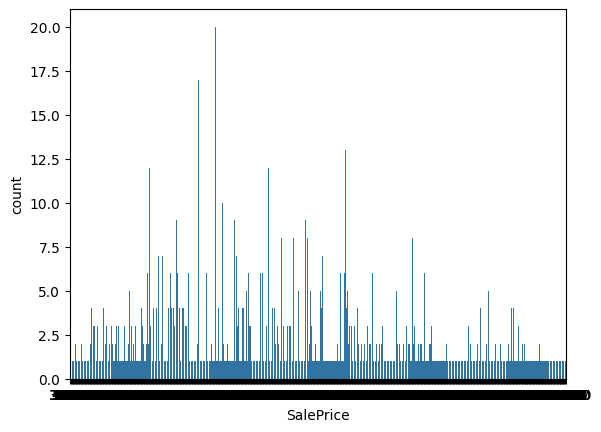

In [7]:
sns.countplot(df, x="SalePrice")

In [8]:
min = df['SalePrice'].min()
print(f"Min = {min}")

max = df['SalePrice'].max()
print(f"Max = {max}")

mean = df['SalePrice'].mean()
print(f"Mean = {mean}")

median = df['SalePrice'].median()
print(f"Median = {median}")

mode = df['SalePrice'].mode()
print(f"Mode = {mode}")

skewness = df['SalePrice'].skew()
print(f"Skewness = {skewness}")

kurtosis = df['SalePrice'].kurtosis()
print(f"Kurtosis = {kurtosis}")

Min = 34900
Max = 755000
Mean = 180921.19589041095
Median = 163000.0
Mode = 0    140000
Name: SalePrice, dtype: int64
Skewness = 1.8828757597682129
Kurtosis = 6.536281860064529


## Histogram,Boxplot,displot

<Axes: xlabel='SalePrice', ylabel='Count'>

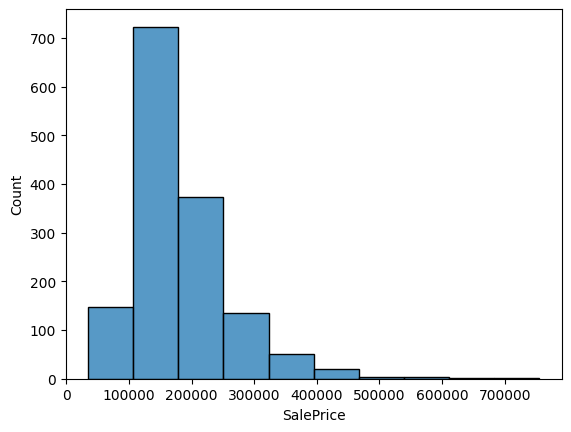

In [9]:
sns.histplot(df, x="SalePrice",bins=10)

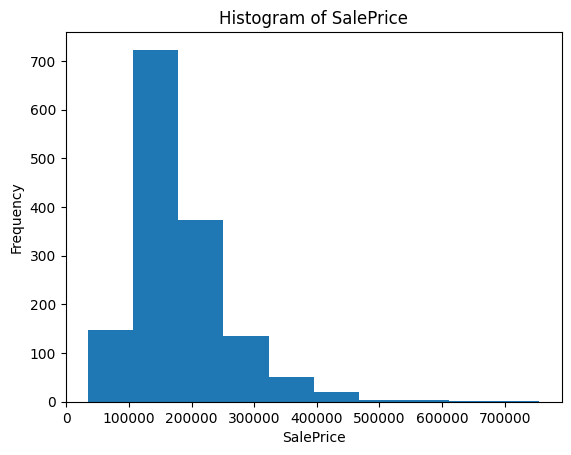

In [10]:
plt.hist(df['SalePrice'], bins=10)
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.title('Histogram of SalePrice')
plt.show()

<Axes: xlabel='SalePrice'>

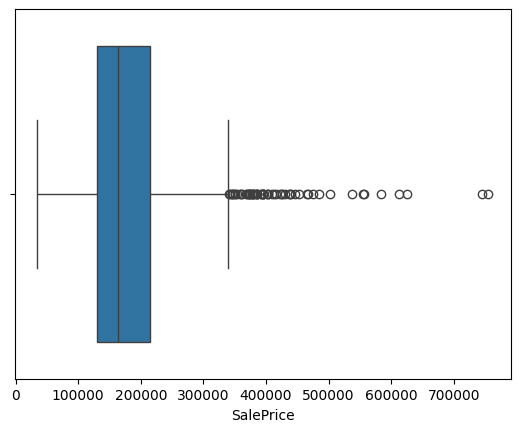

In [11]:
sns.boxplot(df, x="SalePrice")

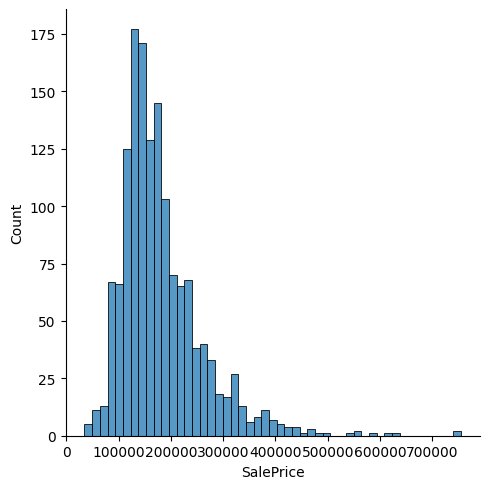

In [12]:
sns.displot(df["SalePrice"])

### Q-Q Plot

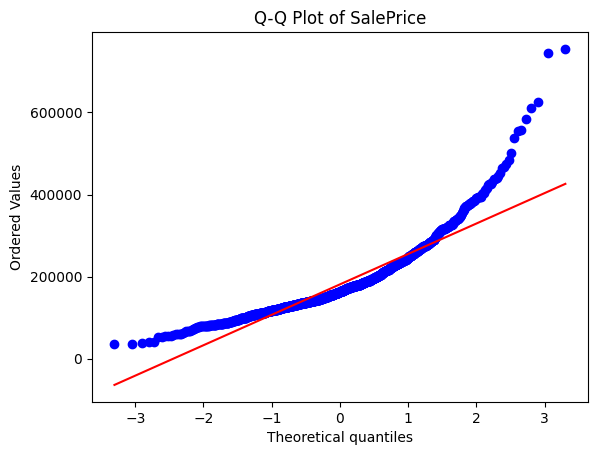

In [13]:
import scipy.stats as stats

stats.probplot(df['SalePrice'], dist="norm", plot=plt)

plt.title("Q-Q Plot of SalePrice")
plt.show()


### Apply a log transformation.

In [14]:
df['log_SalePrice'] = np.log1p(df['SalePrice'])
df['log_SalePrice'].head()


,log_SalePrice
0,12.247699
1,12.109016
2,12.317171
3,11.849405
4,12.429220


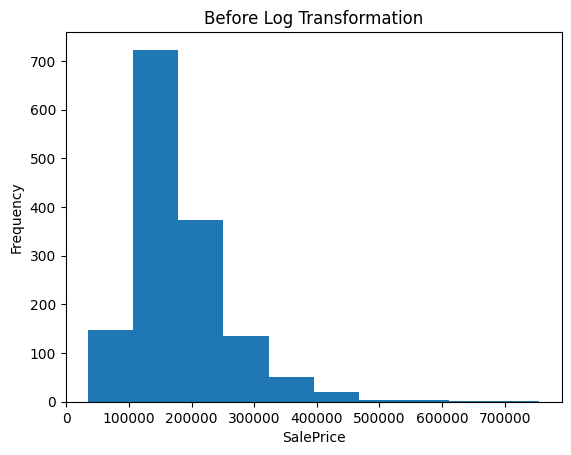

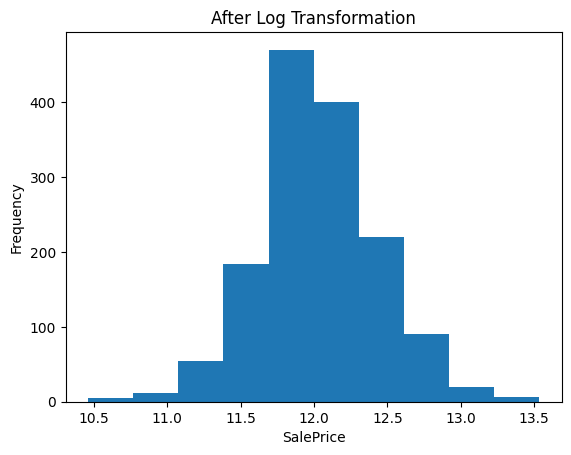

In [15]:

plt.hist(df['SalePrice'], bins=10)
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.title("Before Log Transformation")
plt.show()

df['log_SalePrice'] = np.log1p(df['SalePrice'])

plt.hist(df['log_SalePrice'], bins=10)
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.title("After Log Transformation")
plt.show()


# **Phase 2: The "Cleaning" Ritual**

## IQR

In [16]:
type(df)

pandas.core.frame.DataFrame

In [17]:
data = sorted(df['SalePrice'])
Q1,Q3 = np.percentile(data,[25,75])
IQR = Q3-Q1

print(f"Q1 = {Q1}")
print(f"Q3 = {Q3}")
print(f"IQR = {IQR}")

Q1 = 129975.0
Q3 = 214000.0
IQR = 84025.0


In [19]:
LF = Q1 - 1.5*IQR
HF = Q3 + 1.5*IQR
print(f"Lower Bound = {LF}")
print(f"Upper Bound = {HF}")

Lower Bound = 3937.5
Upper Bound = 340037.5


## Filter Data Frame

In [20]:
filtered_df = df[(df['SalePrice'] >= LF) &
                 (df['SalePrice'] <= HF)]

filtered_df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,log_SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,12.247699
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,12.109016
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,12.317171
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,11.849405
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,12.429220


 ### Check How Many Outliers Removed

In [21]:
print("Original Shape:", df.shape)
print("Filtered Shape:", filtered_df.shape)
print("Outliers Removed:", df.shape[0] - filtered_df.shape[0])


Original Shape: (1460, 82)
Filtered Shape: (1399, 82)
Outliers Removed: 61


## Boxplot BEFORE Removing Outliers

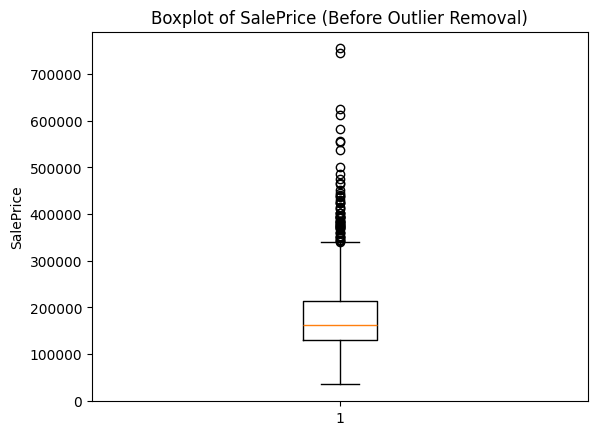

In [22]:
plt.figure()
plt.boxplot(df['SalePrice'])

plt.title("Boxplot of SalePrice (Before Outlier Removal)")
plt.ylabel("SalePrice")

plt.show()


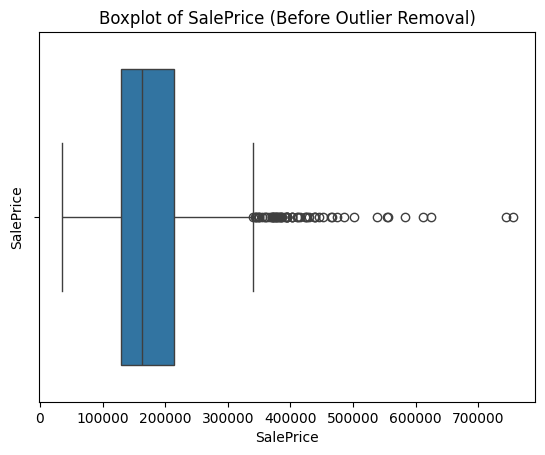

In [23]:
sns.boxplot(df, x="SalePrice")
plt.title("Boxplot of SalePrice (Before Outlier Removal)")
plt.ylabel("SalePrice")

plt.show()

## Boxplot AFTER Removing Outliers

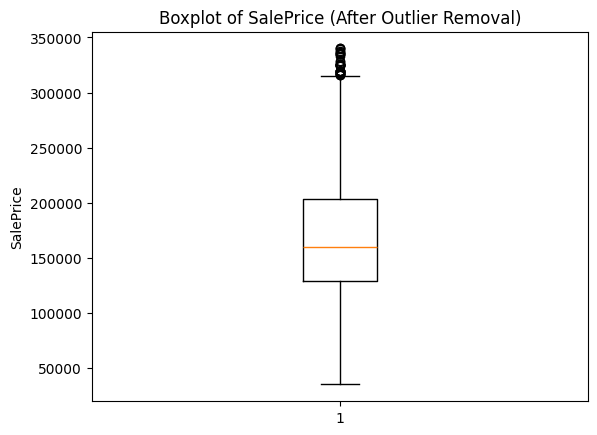

In [24]:
plt.figure()
plt.boxplot(filtered_df['SalePrice'])

plt.title("Boxplot of SalePrice (After Outlier Removal)")
plt.ylabel("SalePrice")

plt.show()


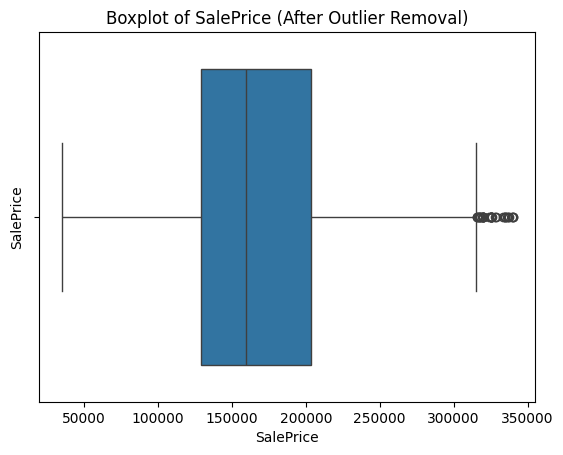

In [25]:
sns.boxplot(filtered_df, x="SalePrice")
plt.title("Boxplot of SalePrice (After Outlier Removal)")
plt.ylabel("SalePrice")

plt.show()

# Phase 3: Multivariate Analysis & Visualization

In [26]:
corr_matrix = df.corr(numeric_only =True)
corr_matrix

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,log_SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917,-0.017942
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284,-0.073959
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799,0.355879
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843,0.257320
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982,0.817185
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856,-0.036868
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897,0.586570
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101,0.565608
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493,0.430809
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420,0.372023


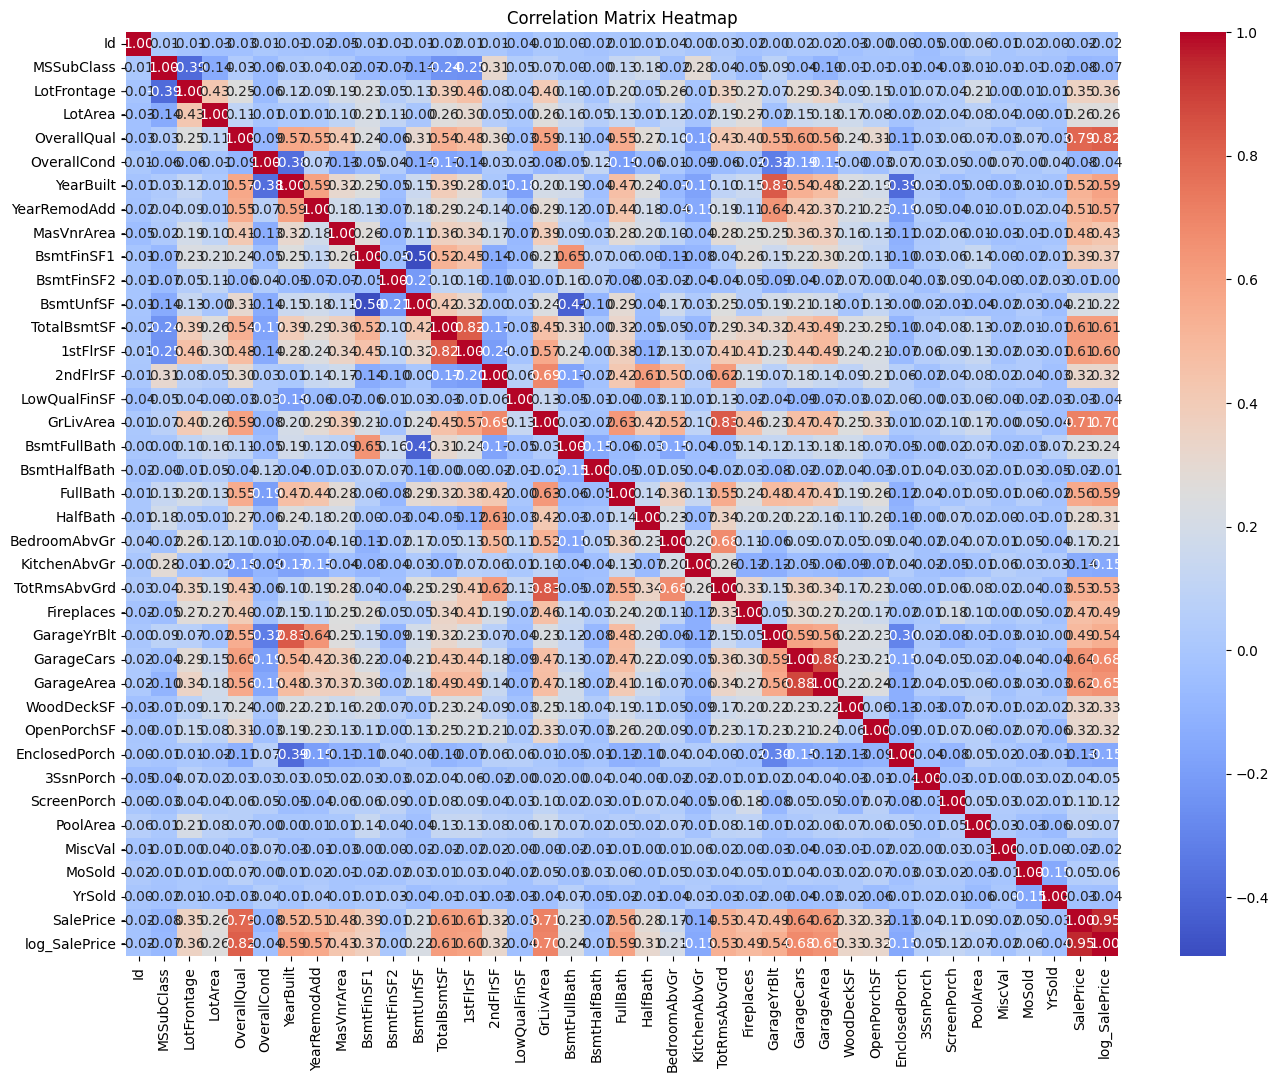

In [27]:
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix, cmap='coolwarm',annot=True,fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()


In [28]:
corr_matrix = df.corr(numeric_only =True)['SalePrice']
corr_matrix

,SalePrice
Id,-0.021917
MSSubClass,-0.084284
LotFrontage,0.351799
LotArea,0.263843
OverallQual,0.790982
OverallCond,-0.077856
YearBuilt,0.522897
YearRemodAdd,0.507101
MasVnrArea,0.477493
BsmtFinSF1,0.386420


In [29]:
corr_matrix = sorted(df.corr(numeric_only =True)['SalePrice'])
corr_matrix


[-0.13590737084214105,
 -0.1285779579259566,
 -0.08428413512659509,
 -0.07785589404867797,
 -0.028922585168736813,
 -0.02560613000067955,
 -0.021916719443430967,
 -0.021189579640303213,
 -0.01684415429735895,
 -0.011378121450215146,
 0.04458366533574838,
 0.046432245223819446,
 0.09240354949187318,
 0.11144657114291112,
 0.16821315430073963,
 0.21447910554696928,
 0.22712223313149427,
 0.2638433538714051,
 0.28410767559478256,
 0.31585622711605504,
 0.31933380283206736,
 0.32441344456812926,
 0.35179909657067737,
 0.3864198062421535,
 0.46692883675152763,
 0.47749304709571444,
 0.4863616774878596,
 0.5071009671113866,
 0.5228973328794967,
 0.5337231555820284,
 0.5606637627484453,
 0.6058521846919153,
 0.6135805515591943,
 0.6234314389183622,
 0.6404091972583519,
 0.7086244776126515,
 0.7909816005838053,
 0.9483743770902764,
 1.0]

In [30]:
corr_matrix = df.corr(numeric_only=True)['SalePrice']
sorted_corr = corr_matrix.sort_values(ascending=False)
sorted_corr

,SalePrice
SalePrice,1.000000
log_SalePrice,0.948374
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723


In [31]:
top10 = sorted_corr.head(10)
top10

,SalePrice
SalePrice,1.000000
log_SalePrice,0.948374
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723


In [32]:
top10_features = top10.index.tolist()
selected_features =top10_features + ['SalePrice']
top_corr_matrix = df[selected_features].corr()
top_corr_matrix


,SalePrice,log_SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,SalePrice
SalePrice,1.000000,0.948374,0.790982,0.708624,0.640409,0.623431,0.613581,0.605852,0.560664,0.533723,1.000000
log_SalePrice,0.948374,1.000000,0.817185,0.700927,0.680625,0.650888,0.612134,0.596981,0.594771,0.534422,0.948374
OverallQual,0.790982,0.817185,1.000000,0.593007,0.600671,0.562022,0.537808,0.476224,0.550600,0.427452,0.790982
GrLivArea,0.708624,0.700927,0.593007,1.000000,0.467247,0.468997,0.454868,0.566024,0.630012,0.825489,0.708624
GarageCars,0.640409,0.680625,0.600671,0.467247,1.000000,0.882475,0.434585,0.439317,0.469672,0.362289,0.640409
GarageArea,0.623431,0.650888,0.562022,0.468997,0.882475,1.000000,0.486665,0.489782,0.405656,0.337822,0.623431
TotalBsmtSF,0.613581,0.612134,0.537808,0.454868,0.434585,0.486665,1.000000,0.819530,0.323722,0.285573,0.613581
1stFlrSF,0.605852,0.596981,0.476224,0.566024,0.439317,0.489782,0.819530,1.000000,0.380637,0.409516,0.605852
FullBath,0.560664,0.594771,0.550600,0.630012,0.469672,0.405656,0.323722,0.380637,1.000000,0.554784,0.560664
TotRmsAbvGrd,0.533723,0.534422,0.427452,0.825489,0.362289,0.337822,0.285573,0.409516,0.554784,1.000000,0.533723


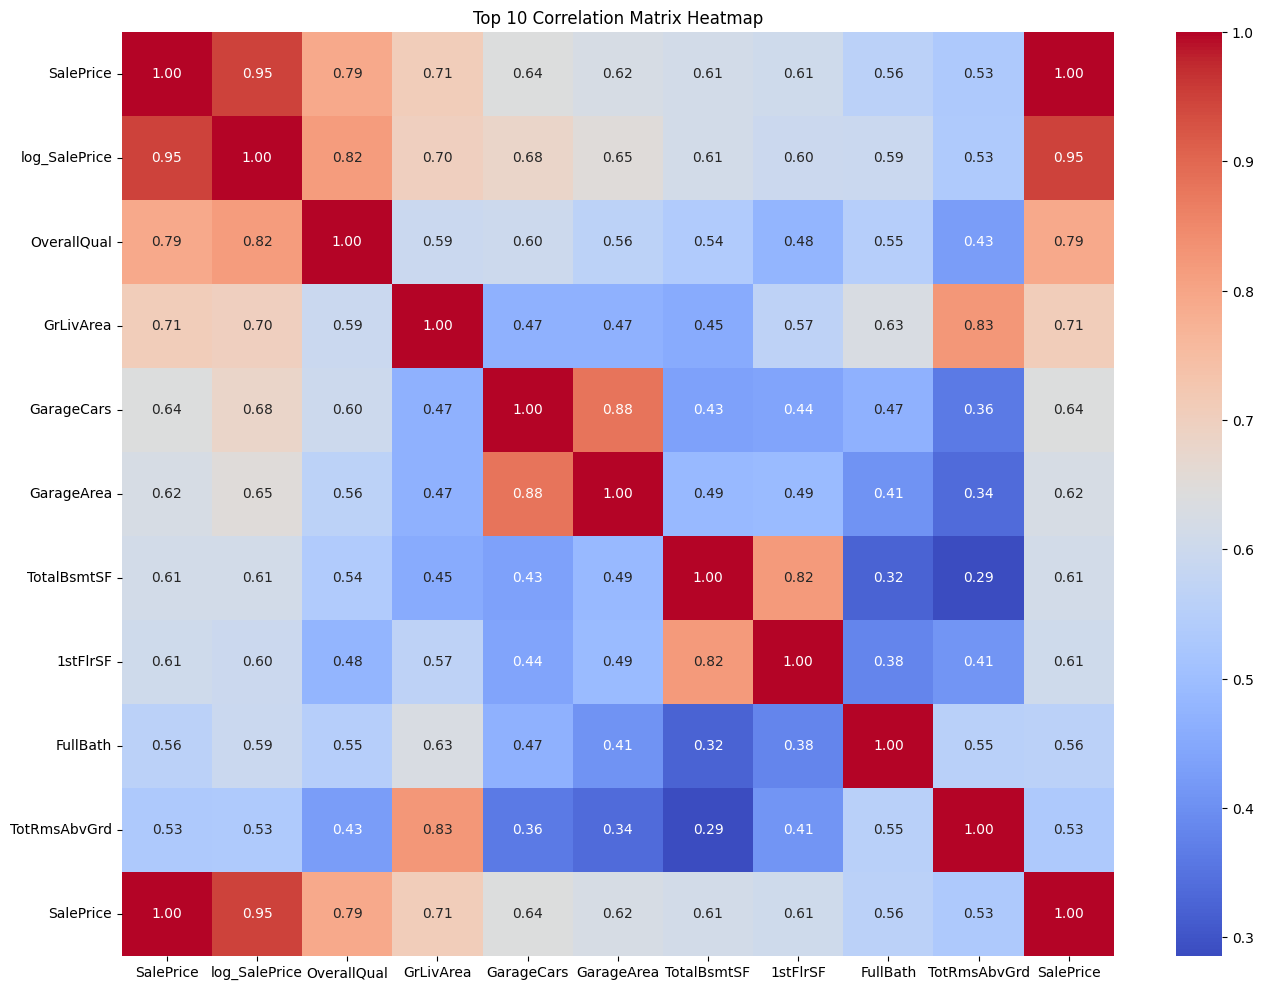

In [33]:
plt.figure(figsize=(16,12))
sns.heatmap(top_corr_matrix, cmap='coolwarm',annot=True,fmt=".2f")
plt.title("Top 10 Correlation Matrix Heatmap")
plt.show()

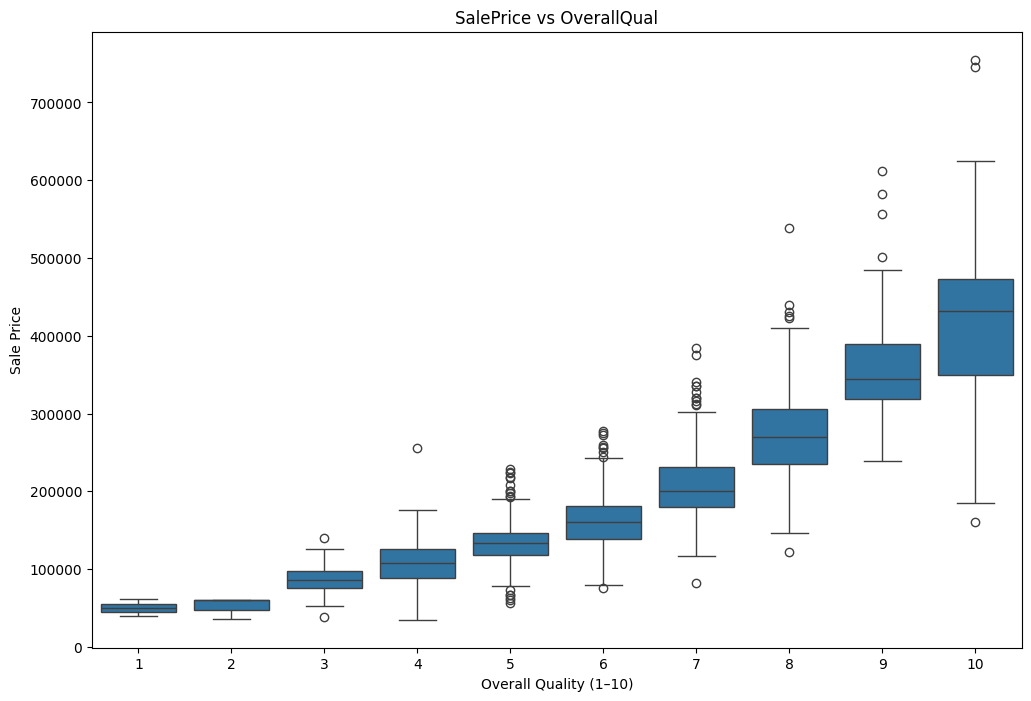

In [34]:
plt.figure(figsize=(12,8))

sns.boxplot(data=df,x='OverallQual',
            y='SalePrice',
            )

plt.title("SalePrice vs OverallQual")
plt.xlabel("Overall Quality (1–10)")
plt.ylabel("Sale Price")
plt.show()


In [35]:
avg_price = df.groupby('Neighborhood')['SalePrice'].mean()
avg_price

,SalePrice
Neighborhood,
Blmngtn,194870.882353
Blueste,137500.000000
BrDale,104493.750000
BrkSide,124834.051724
ClearCr,212565.428571
CollgCr,197965.773333
Crawfor,210624.725490
Edwards,128219.700000
Gilbert,192854.506329


In [36]:
avg_price_sorted = avg_price.sort_values(ascending=False)
avg_price_sorted


,SalePrice
Neighborhood,
NoRidge,335295.317073
NridgHt,316270.623377
StoneBr,310499.000000
Timber,242247.447368
Veenker,238772.727273
Somerst,225379.837209
ClearCr,212565.428571
Crawfor,210624.725490
CollgCr,197965.773333


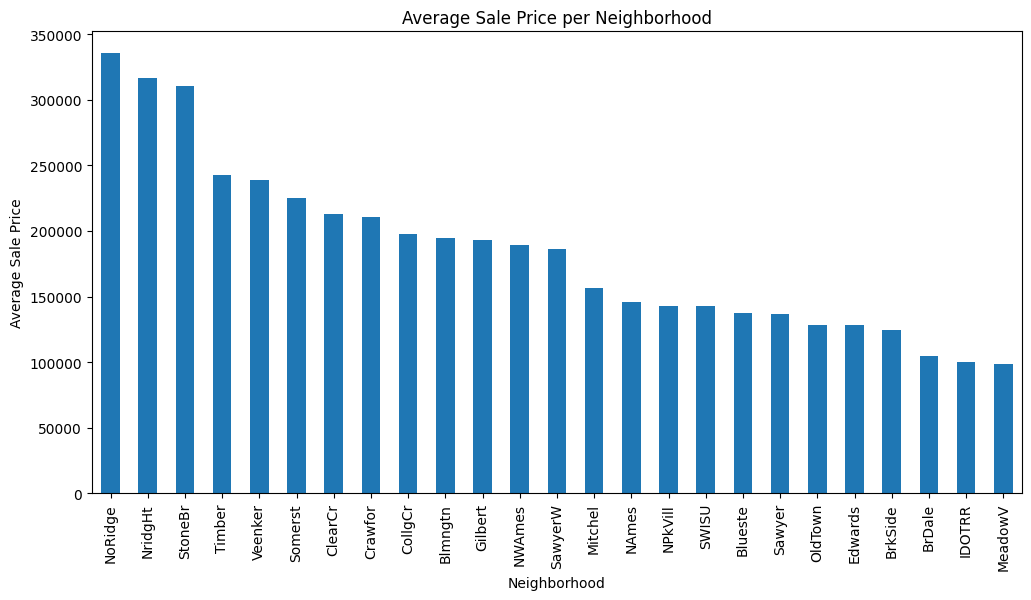

In [37]:

plt.figure(figsize=(12,6))

avg_price_sorted.plot(kind='bar')

plt.title("Average Sale Price per Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Average Sale Price")
plt.xticks(rotation=90)
plt.show()


# Phase 4: Final Insights & Reporting

In [40]:
df.corr(numeric_only=True)['SalePrice']\
  .sort_values(ascending=False)[1:4]


,SalePrice
log_SalePrice,0.948374
OverallQual,0.790982
GrLivArea,0.708624


An analysis of the housing dataset was conducted to identify the key factors that most strongly influence house prices. Using correlation analysis and data visualization techniques, three primary drivers were identified: OverallQual, GrLivArea, and GarageCars. These variables demonstrate the strongest positive relationships with SalePrice and should be prioritized in pricing strategy and predictive modeling.

Based on exploratory analysis of the training dataset, three key factors most strongly influence house prices:

**Overall Quality(OverallQual) :** The strongest predictor of price. Higher construction and finish quality consistently lead to higher sale prices.

**Above-Ground Living Area (GrLivArea):**
Larger usable living space significantly increases property value, though extremely large homes show slightly diminishing returns.

**Neighborhood (Location):** Location strongly impacts pricing. Certain neighborhoods function as premium areas and command significantly higher average prices.

# Anomaly Report – Missing Data Assessment

In [41]:
missing = df.isnull().sum()
missing

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
YrSold,0
SaleType,0
SaleCondition,0
SalePrice,0


In [42]:
missing_sorted = missing.sort_values(ascending=False)
print(missing_sorted.head(10))


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageYrBlt       81
GarageFinish      81
dtype: int64


# Anomaly Report – Missing Data Assessment

During the exploratory data analysis, several features were identified as having a high number of missing values. The most affected variables include PoolQC, MiscFeature, Alley, Fence, FireplaceQu, and LotFrontage.

A closer examination suggests that, in many cases, the missing data does not indicate an error. Instead, it reflects the absence of a particular feature. For example, if a house does not have a pool, the PoolQC field is recorded as missing. Similarly, missing values in Alley or Fence often mean the property does not include those amenities. However, LotFrontage represents actual numerical data, and its missing values require careful treatment.

From a modeling perspective, these missing values can significantly affect future predictive performance if not handled properly. If the model interprets missing entries incorrectly, it may introduce bias or reduce prediction accuracy. Additionally, features with extremely high proportions of missing data may contribute more noise than useful information.

To ensure a reliable and robust predictive model, it is recommended to treat absence-related categorical features as “None,” apply appropriate imputation techniques (such as median imputation) for numerical variables, and consider removing features with excessively high missing rates if they provide limited predictive value.

Overall, careful handling of missing data is essential to maintain model accuracy and prevent distorted results.

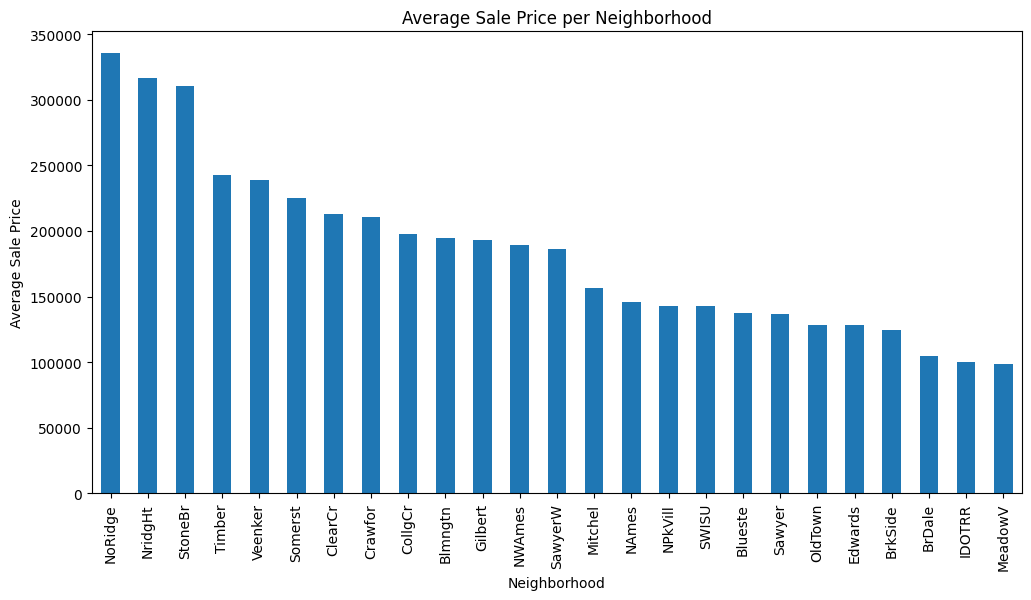

In [43]:
plt.figure(figsize=(12,6))

avg_price_sorted.plot(kind='bar')

plt.title("Average Sale Price per Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Average Sale Price")
plt.xticks(rotation=90)
plt.show()


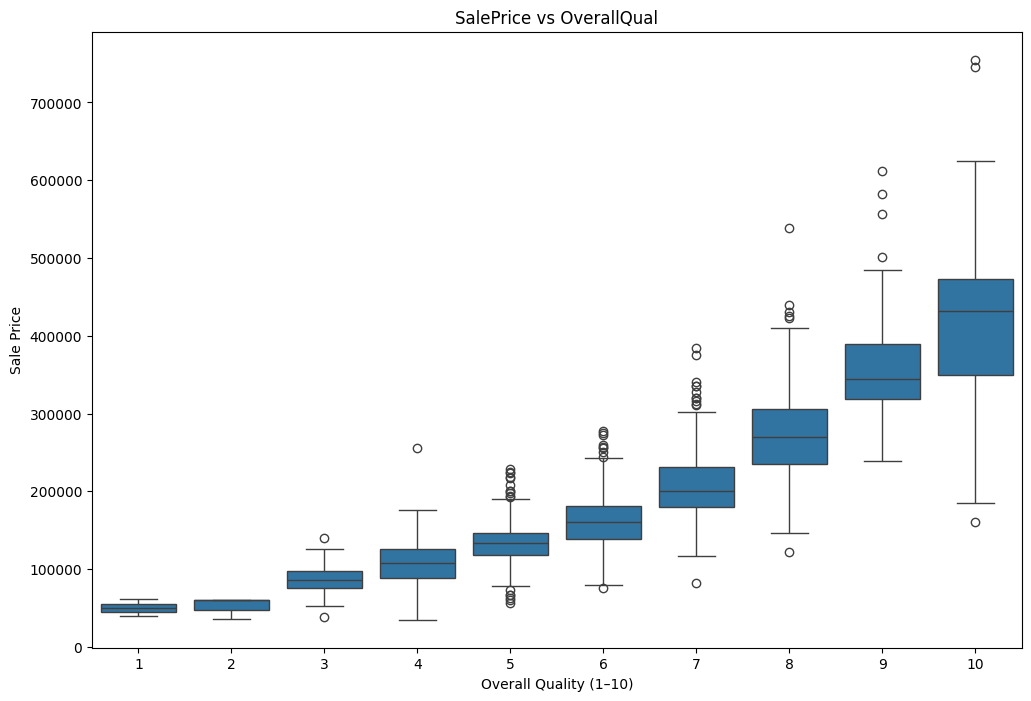

In [44]:
plt.figure(figsize=(12,8))

sns.boxplot(data=df,x='OverallQual',
            y='SalePrice',
            )

plt.title("SalePrice vs OverallQual")
plt.xlabel("Overall Quality (1–10)")
plt.ylabel("Sale Price")
plt.show()

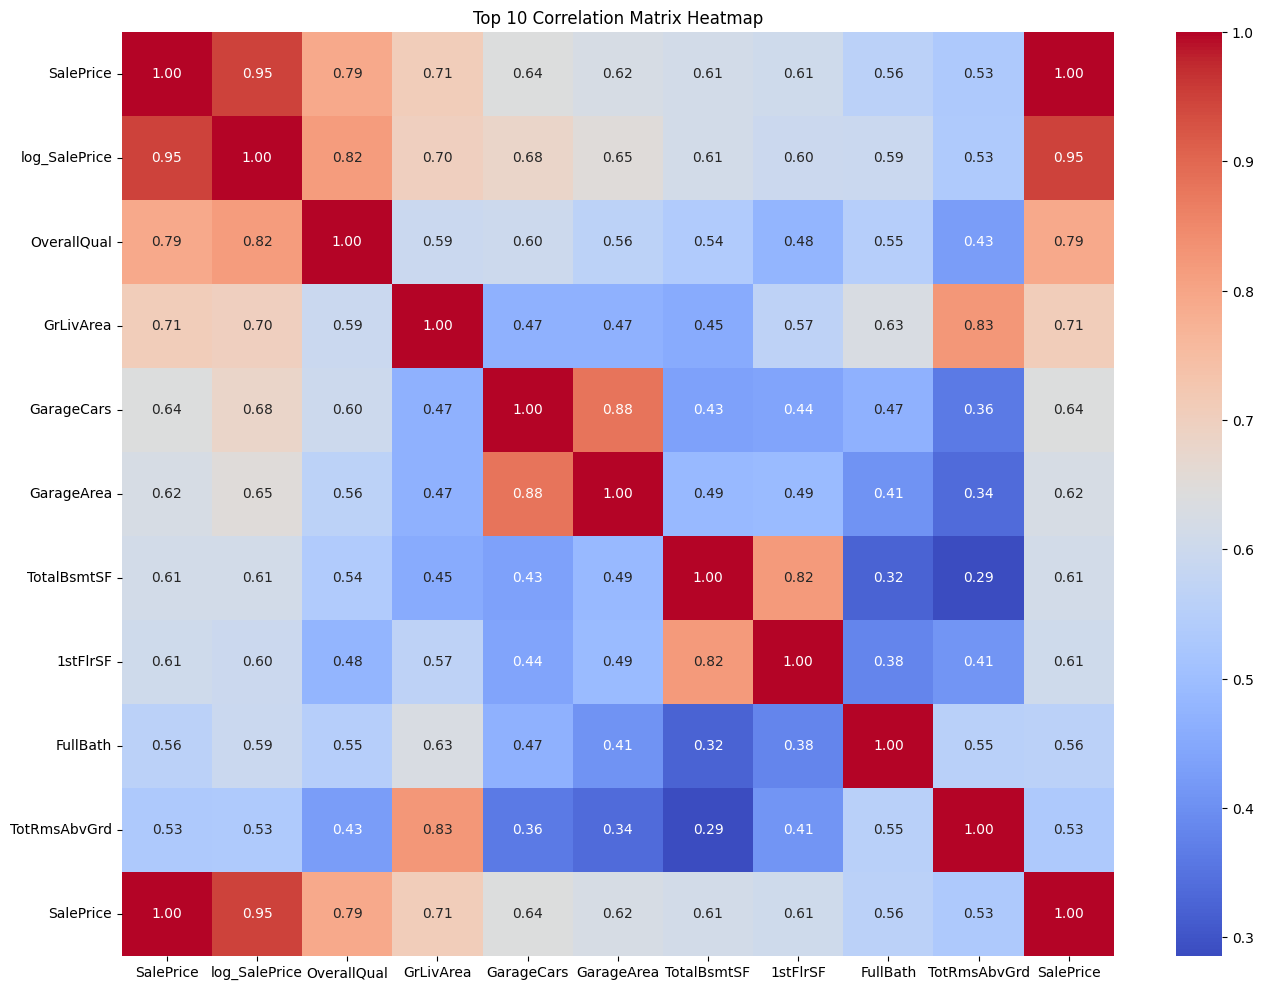

In [45]:
plt.figure(figsize=(16,12))
sns.heatmap(top_corr_matrix, cmap='coolwarm',annot=True,fmt=".2f")
plt.title("Top 10 Correlation Matrix Heatmap")
plt.show()

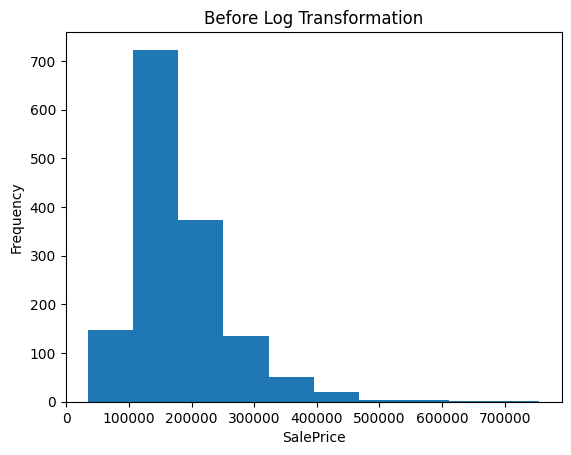

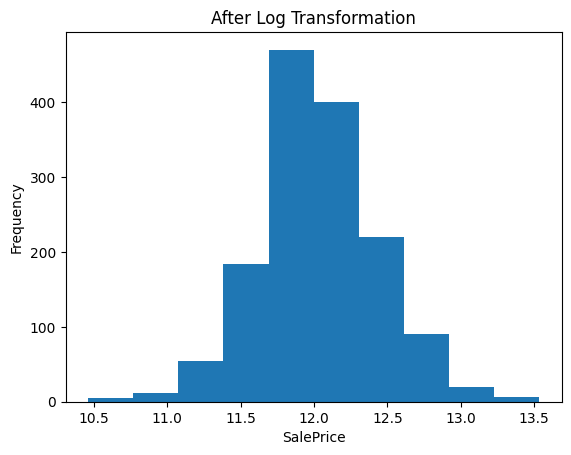

In [46]:

plt.hist(df['SalePrice'], bins=10)
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.title("Before Log Transformation")
plt.show()

df['log_SalePrice'] = np.log1p(df['SalePrice'])

plt.hist(df['log_SalePrice'], bins=10)
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.title("After Log Transformation")
plt.show()